In [3]:
import numpy as np
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt
from project.adam_optim_project.adam import AdamOptimizer
from project.adam_optim_project.mnist import MnistTest
%matplotlib inline

In [4]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)
    
    def forward(self, x):
        res = self.linear(x)
        return res

In [5]:
class LinearRegressionTest:
    def __init__(self, input_dim, data_len):
        self.input_dim = input_dim
        self.data_len = data_len
        self.mse = torch.nn.MSELoss()
        self.X = torch.rand(data_len, input_dim)
        self.y = torch.rand(data_len, 1)
        X_np = np.array(self.X)
        best_w = np.linalg.inv(X_np.T@X_np)@X_np.T@np.array(self.y)
        self.min_err = X_np @ best_w - np.array(self.y)
    
    def __call__(self, optimizer_, epochs=1000, **kwargs):
        model = LinearRegression(self.input_dim)
        optimizer = optimizer_(model.parameters(), **kwargs)
        loss_values = []

        for i in range(epochs):
            inputs = Variable(self.X)
            labels = Variable(self.y)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = self.mse(outputs, labels)
            loss.backward()

            optimizer.step()
            loss_values.append(loss.item())

        return np.log(np.array(loss_values) - np.mean(self.min_err**2))

In [6]:
lr = 0.005
optimizers = [
    torch.optim.SGD,
    torch.optim.SGD,
    torch.optim.SGD,
    torch.optim.Adam,
    AdamOptimizer,
    AdamOptimizer
]
optimizer_names = [
    "SGD", "Momentum SGD", "Nesterov Momentum SGD", "Torch Adam", "Custom Adam", "AMSGrad"
]
optimizer_params = [
    dict(lr=lr),
    dict(lr=lr, momentum=0.9, nesterov=False),
    dict(lr=lr, momentum=0.9, nesterov=True),
    dict(),
    dict(),
    dict(amsgrad=True),
]

In [9]:
def evaluate_test(test, iterations=4):
    plt.figure(figsize=(15, 10))
    for i in range(iterations):
        plt.subplot(2, 2, i + 1)
        loss = []
        for optimizer, params in zip(optimizers, optimizer_params):
            loss.append(test(optimizer, **params))

        for opt_loss, opt_name in zip(loss, optimizer_names):
            plt.plot(opt_loss, label=opt_name)
        
        plt.xlabel("Iterations")
        plt.ylabel("Log loss")
        plt.legend()

In [ ]:
test = MnistTest
evaluate_test(test, iterations=1)

Processing...
Done!
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.341196
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.272859
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.251548
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.221743
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.144702
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.106922
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.037127
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.932770
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.767877
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.528908
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.433922
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.403071
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.182234
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.177727
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.112120
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.895998
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.867472
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.022822
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.634973
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.014226
Train Epo

Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.161647


/Users/let4ik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log


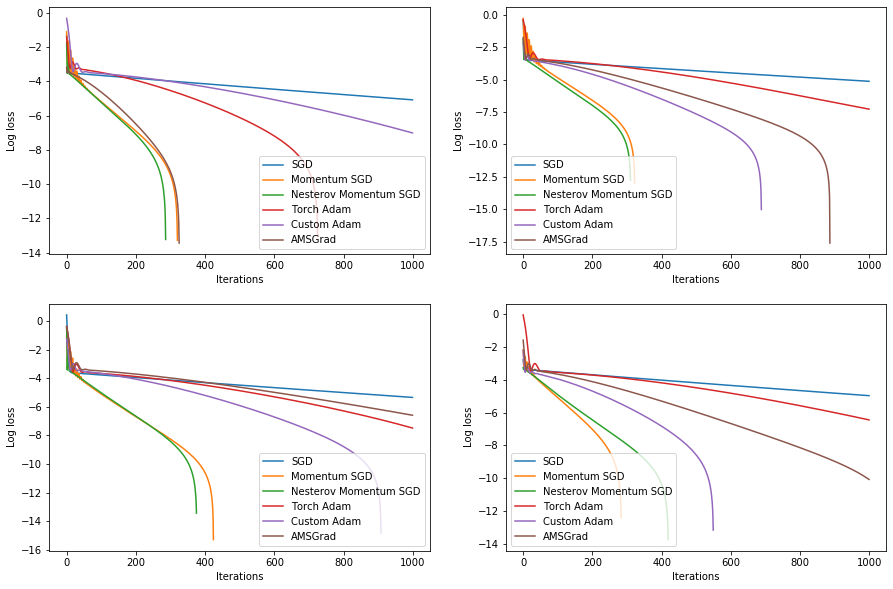

In [14]:
input_dim = 100
data_len = 2000
test = LinearRegressionTest(input_dim, data_len)
evaluate_test(test)